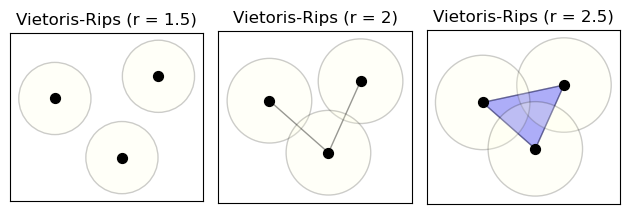

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.spatial import distance_matrix
from matplotlib.patches import Circle, Polygon

# Step 1: Generate random 2D points
np.random.seed(1)
points = np.random.randn(3, 2)  # 10 points in 2D

fig, axs = plt.subplots(1, 3)

for i, r in enumerate([1.5, 2, 2.5]):
    ax = axs[i]
    # Step 2: Compute pairwise distances
    dists = distance_matrix(points, points)

    # Step 3: Set filtration radius
    # r = 2.5# radius threshold for connection

    # Step 4: Build the Vietoris–Rips graph
    G = nx.Graph()
    for i in range(len(points)):
        G.add_node(i, pos=points[i])

    # Add edges for points within distance r
    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            if dists[i, j] <= r:
                G.add_edge(i, j)

    # Step 5: Function to find triangles (2-simplices)
    def find_triangles(G):
        triangles = set()
        for node in G.nodes():
            neighbors = list(G.neighbors(node))
            for i in range(len(neighbors)):
                for j in range(i + 1, len(neighbors)):
                    u, v = neighbors[i], neighbors[j]
                    if G.has_edge(u, v):
                        triangle = tuple(sorted([node, u, v]))
                        triangles.add(triangle)
        return list(triangles)

    triangles = find_triangles(G)

    # Step 6: Draw the graph with colored triangles
    # fig, ax = plt.subplots(figsize=(6, 6))
    pos = {i: points[i] for i in range(len(points))}

    # Draw filled triangles
    for tri in triangles:
        triangle_coords = [points[i] for i in tri]
        polygon = Polygon(triangle_coords, closed=True, facecolor='blue', edgecolor='blue', alpha=0.4)
        ax.add_patch(polygon)

    # Draw edges and nodes
    nx.draw_networkx_edges(G, pos, alpha=0.5, ax=ax)
    nx.draw_networkx_nodes(G, pos, node_color='black', node_size=50, ax=ax)

    # Draw filtration circles
    circles = [Circle(points[i], r/2, facecolor='lightyellow', edgecolor='black', alpha=0.2) for i in range(len(points))]
    for circle in circles:
        ax.add_patch(circle)

    # Final plot settings
    ax.set_aspect('equal')
    ax.set_title(f'Vietoris-Rips (r = {r})')
# plt.axis('off')
plt.tight_layout()
plt.show()

In [125]:
theta = np.linspace(0, 2 * np.pi, 10, endpoint=False)
radius = 0.2
center = np.array([0.2, 0.2])
circle_points = np.stack([np.cos(theta), np.sin(theta)], axis=1) * radius + center

# Generate line points from circle center to top-right corner
line_start = center + 0.3
line_end = np.array([1.0, 1.0])
num_line_points = 8
line_points = np.linspace(line_start, line_end, num_line_points)

# Combine all points
points_combined = np.vstack([circle_points, line_points])

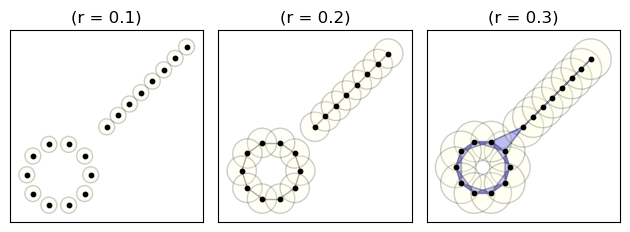

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.spatial import distance_matrix
from matplotlib.patches import Circle, Polygon

# Step 1: Generate random 2D points
# np.random.seed(2)
points = points_combined #np.random.randn(20, 2)  # 10 points in 2D

# Step 2: Compute pairwise distances
dists = distance_matrix(points, points)

# Step 3: Set filtration radius
r = 0.05# radius threshold for connection

fig, axs = plt.subplots(1, 3)

for i, r in enumerate([0.1, 0.2, 0.3]):
    ax = axs[i]
    G = nx.Graph()
    for i in range(len(points)):
        G.add_node(i, pos=points[i])

    # Add edges for points within distance r
    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            if dists[i, j] <= r:
                G.add_edge(i, j)

    # Step 5: Function to find triangles (2-simplices)
    def find_triangles(G):
        triangles = set()
        for node in G.nodes():
            neighbors = list(G.neighbors(node))
            for i in range(len(neighbors)):
                for j in range(i + 1, len(neighbors)):
                    u, v = neighbors[i], neighbors[j]
                    if G.has_edge(u, v):
                        triangle = tuple(sorted([node, u, v]))
                        triangles.add(triangle)
        return list(triangles)

    triangles = find_triangles(G)

    # Step 6: Draw the graph with colored triangles
    pos = {i: points[i] for i in range(len(points))}

    # Draw filled triangles
    for tri in triangles:
        triangle_coords = [points[i] for i in tri]
        polygon = Polygon(triangle_coords, closed=True, facecolor='blue', edgecolor='blue', alpha=0.4)
        ax.add_patch(polygon)

    # Draw edges and nodes
    nx.draw_networkx_edges(G, pos, alpha=0.5, ax=ax)
    nx.draw_networkx_nodes(G, pos, node_color='black', node_size=10, ax=ax)

    # Draw filtration circles
    circles = [Circle(points[i], r/2, facecolor='lightyellow', edgecolor='black', alpha=0.2) for i in range(len(points))]
    for circle in circles:
        ax.add_patch(circle)

    # Final plot settings
    ax.set_aspect('equal')
    ax.set_title(f'(r = {r})')
# plt.axis('off')
plt.tight_layout()
plt.show()

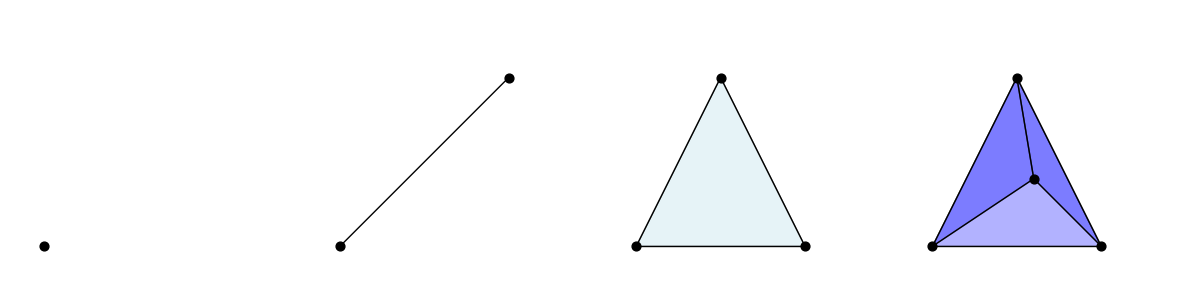

In [137]:
# Improved visualization of a 3-simplex (tetrahedron) with better perspective, clear faces, and labeled points

fig, axs = plt.subplots(1, 4, figsize=(12, 3))

# Simplices data
simplices = [
    np.array([[0, 0]]),  # 0-simplex
    np.array([[0, 0], [1, 1]]),  # 1-simplex
    np.array([[0, 0], [1, 0], [0.5, 1]]),  # 2-simplex
    np.array([[0, 0], [1, 0], [0.5, 1], [0.6, 0.4]])  # 3-simplex (tetrahedron in 2D)
]

# Colors
face_colors = ['white', 'white', 'lightblue', 'blue']  # lighter red shades

for i, ax in enumerate(axs):
    points = simplices[i]

    # Draw filled triangles for higher simplices
    if i >= 2:
        triangle = Polygon(points[:3], closed=True, facecolor=face_colors[i], edgecolor='black', alpha=0.3)
        ax.add_patch(triangle)

    # Additional face for tetrahedron
    if i == 3:
        # Faces: [1, 2, 3] and [0, 2, 3]
        face1 = Polygon([points[1], points[2], points[3]], closed=True, facecolor='blue', edgecolor='black', alpha=0.3)
        face2 = Polygon([points[0], points[2], points[3]], closed=True, facecolor='blue', edgecolor='black', alpha=0.3)
        ax.add_patch(face1)
        ax.add_patch(face2)

    # Draw all edges
    if i >= 1:
        for j in range(len(points)):
            for k in range(j + 1, len(points)):
                ax.plot([points[j, 0], points[k, 0]], [points[j, 1], points[k, 1]], color='black', linewidth=1, zorder=1)

    # Draw nodes as black dots
    ax.scatter(points[:, 0], points[:, 1], color='black', s=40, zorder=2)

    ax.set_xlim(-0.2, 1.4)
    ax.set_ylim(-0.2, 1.4)
    ax.set_aspect('equal')
    ax.axis('off')

plt.tight_layout()
plt.show()